In [12]:
from ipynb.fs.full.whole_df import get_uppers, get_downers, get_whole_df, get_average_person_number, get_all_distances
import os
import numpy as np
import itertools
import pandas as pd
import statistics
import math
import seaborn as sb
import matplotlib.pyplot as plt

In [13]:
columns = columns = ["Date", "d<=0.5", "0.5<d<=1", "1<d<=1.5", "1.5<d<=2", "2<d<=2.5", "2.5<d<=3", "3<d<=3.5", "3.5<d<=4", 
                    "4<d<=4.5", "4.5<d<=5", "5<d<=5.5", "5.5<d"]
heatmapDf = pd.DataFrame(columns = columns)
#heatmapDf = heatmapDf.append({"Date": 1, "d<=0.5": 1, "0.5<d<=1": 1, "1<d<=1.5": 1, "1.5<d<=2": 1, "2<d<=2.5": 1, "2.5<d<=3": 1, "3<d": 1}, ignore_index = True)
heatmapDf

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d<=3.5,3.5<d<=4,4<d<=4.5,4.5<d<=5,5<d<=5.5,5.5<d


In [14]:
#StandardDeviation ist nicht sinnvoll, da alle Abstände sowieso schon in kleinen Intervallen liegen
for filename in os.listdir(r"C:\Users\robin\Documents\Bachelorarbeit\Daten ZHDB"):
    if "0304" in filename or "0401" in filename or "0506" in filename:
        df = get_whole_df(filename, 5, 5)
        borderDistance = get_all_distances(df, inBorder = False)
        print(str(len(borderDistance)) + " Abstände wurden gemessen")
        halfMeter = len([i for i in borderDistance if i <= 0.5])
        oneMeter = len([i for i in borderDistance if (i <= 1) and (i > 0.5)])
        oneAndHalfMeter = len([i for i in borderDistance if (i <= 1.5) and (i > 1)])
        twoMeter = len([i for i in borderDistance if (i <= 2) and (i > 1.5)])
        twoAndHalfMeter = len([i for i in borderDistance if (i <= 2.5) and (i > 2)])
        threeMeter = len([i for i in borderDistance if (i <= 3) and (i > 2.5)])
        threeAndHalfMeter = len([i for i in borderDistance if (i <= 3.5) and (i > 3)])
        fourMeter = len([i for i in borderDistance if (i <= 4) and (i > 3.5)])
        fourAndHalfMeter = len([i for i in borderDistance if (i <= 4.5) and (i > 4)])
        fiveMeter = len([i for i in borderDistance if (i <= 5) and (i > 4.5)])
        fiveAndHalfMeter = len([i for i in borderDistance if (i <= 5.5) and (i > 5)])
        biggerFivePointFive = len([i for i in borderDistance if (i > 5.5)])
        heatmapDf = heatmapDf.append({"Date": filename, "d<=0.5": halfMeter, "0.5<d<=1": oneMeter, "1<d<=1.5": oneAndHalfMeter, 
                                      "1.5<d<=2": twoMeter, "2<d<=2.5": twoAndHalfMeter, "2.5<d<=3": threeMeter, 
                                      "3<d<=3.5": threeAndHalfMeter, "3.5<d<=4": fourMeter, "4<d<=4.5": fourAndHalfMeter, 
                                     "4.5<d<=5": fiveMeter, "5<d<=5.5": fiveAndHalfMeter, "5.5<d": biggerFivePointFive}, ignore_index = True)

ZHDB_0304_6_20.txt
6410 Abstände wurden gemessen
ZHDB_0401_6_20.txt
1410 Abstände wurden gemessen
ZHDB_0506_6_20.txt
2764 Abstände wurden gemessen


In [15]:
heatmapDf

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d<=3.5,3.5<d<=4,4<d<=4.5,4.5<d<=5,5<d<=5.5,5.5<d
0,ZHDB_0304_6_20.txt,104,1204,911,860,667,512,385,266,201,150,119,1031
1,ZHDB_0401_6_20.txt,2,93,196,134,142,129,126,65,77,64,55,327
2,ZHDB_0506_6_20.txt,56,303,389,315,270,214,195,136,118,90,79,599


In [16]:
date = heatmapDf["Date"]
heatmapDfRelatvie = pd.DataFrame(columns = columns)

In [17]:
for index, row in heatmapDf.iterrows():
    anzahlAbstande = sum(row[1:])
    date = row[0]
    relativeAbstande = row[1:]/anzahlAbstande
    heatmapDfRelatvie = heatmapDfRelatvie.append({"Date": date, "d<=0.5": relativeAbstande[0], "0.5<d<=1": relativeAbstande[1], 
                                                  "1<d<=1.5": relativeAbstande[2], "1.5<d<=2": relativeAbstande[3], 
                                                  "2<d<=2.5": relativeAbstande[4], "2.5<d<=3": relativeAbstande[5],
                                                  "3<d<=3.5": relativeAbstande[6], "3.5<d<=4": relativeAbstande[7],
                                                  "4<d<=4.5": relativeAbstande[8], "4.5<d<=5": relativeAbstande[9], 
                                                  "5<d<=5.5": relativeAbstande[10], "5.5<d": relativeAbstande[11]}, 
                                                 ignore_index = True)
heatmapDfRelatvie

,Date,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d<=3.5,3.5<d<=4,4<d<=4.5,4.5<d<=5,5<d<=5.5,5.5<d
0,ZHDB_0304_6_20.txt,0.016225,0.187832,0.142122,0.134165,0.104056,0.079875,0.060062,0.041498,0.031357,0.023401,0.018565,0.160842
1,ZHDB_0401_6_20.txt,0.001418,0.065957,0.139007,0.095035,0.100709,0.091489,0.089362,0.046099,0.054610,0.045390,0.039007,0.231915
2,ZHDB_0506_6_20.txt,0.020260,0.109624,0.140738,0.113965,0.097685,0.077424,0.070550,0.049204,0.042692,0.032562,0.028582,0.216715


In [18]:
heatmapDfRelatvie.index = heatmapDfRelatvie["Date"]
heatmapDfRelatvie = heatmapDfRelatvie.drop("Date", axis = 1)
heatmapDfRelatvie

,d<=0.5,0.5<d<=1,1<d<=1.5,1.5<d<=2,2<d<=2.5,2.5<d<=3,3<d<=3.5,3.5<d<=4,4<d<=4.5,4.5<d<=5,5<d<=5.5,5.5<d
Date,,,,,,,,,,,,
ZHDB_0304_6_20.txt,0.016225,0.187832,0.142122,0.134165,0.104056,0.079875,0.060062,0.041498,0.031357,0.023401,0.018565,0.160842
ZHDB_0401_6_20.txt,0.001418,0.065957,0.139007,0.095035,0.100709,0.091489,0.089362,0.046099,0.054610,0.045390,0.039007,0.231915
ZHDB_0506_6_20.txt,0.020260,0.109624,0.140738,0.113965,0.097685,0.077424,0.070550,0.049204,0.042692,0.032562,0.028582,0.216715


In [19]:
heatmapDfRelatvieSwap = heatmapDfRelatvie.transpose()
heatmapDfRelatvieSwap.columns = ["04.03.2020", "01.04.2020", "06.05.2020"]
heatmapDfRelatvieSwap

,04.03.2020,01.04.2020,06.05.2020
d<=0.5,0.016225,0.001418,0.020260
0.5<d<=1,0.187832,0.065957,0.109624
1<d<=1.5,0.142122,0.139007,0.140738
1.5<d<=2,0.134165,0.095035,0.113965
2<d<=2.5,0.104056,0.100709,0.097685
2.5<d<=3,0.079875,0.091489,0.077424
3<d<=3.5,0.060062,0.089362,0.070550
3.5<d<=4,0.041498,0.046099,0.049204
4<d<=4.5,0.031357,0.054610,0.042692
4.5<d<=5,0.023401,0.045390,0.032562


In [20]:
for date in heatmapDfRelatvieSwap.columns:
    heatmapDfRelatvieSwap[date] = heatmapDfRelatvieSwap[date] * 100

In [21]:
import matplotlib as mlp
plt.rcParams["font.family"] = "Microsoft Yi Baiti"
mlp.rc('font',family="Microsoft Yi Baiti")

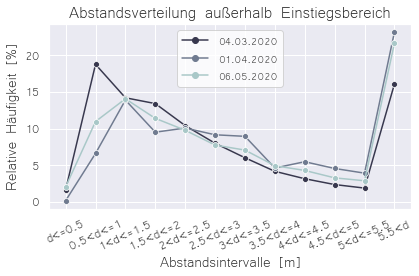

In [22]:
sb.set()
sb.lineplot(data = heatmapDfRelatvieSwap, markers = ["o", "o", "o", "o"], palette = "bone", sort = False, dashes = False)
plt.xticks(fontsize = 15, fontname = "Microsoft Yi Baiti", rotation = 25)
plt.xlabel("Abstandsintervalle [m]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.ylabel("Relative Häufigkeit [%]", fontsize = 18, fontname = "Microsoft Yi Baiti")
plt.yticks(fontsize = 15, fontname = "Microsoft Yi Baiti")
plt.title("Abstandsverteilung außerhalb Einstiegsbereich", fontsize = 20,fontname="Microsoft Yi Baiti")
plt.legend(facecolor = "white", prop={'family':"Microsoft Yi Baiti", 'size':13})
plt.tight_layout()
plt.savefig(r"Abstandsverteilung\Abstandsverteilung außerhalb Einstiegsbereich", dpi = 200)